In [1]:
using Gadfly

In [2]:
M = 5

5

In [3]:
a = [0.5,-0.02,-0.4,0.2,-0.07]

5-element Array{Float64,1}:
  0.5 
 -0.02
 -0.4 
  0.2 
 -0.07

In [4]:
N = 100000

100000

In [5]:
using Distributions

In [6]:
d = Normal(0,1)

Distributions.Normal{Int64}(μ=0, σ=1)

In [7]:
srand(1)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1749029653,1072851681,1610647787,1072862326,1841712345,1073426746,-198061126,1073322060,-156153802,1073567984  …  1977574422,1073209915,278919868,1072835605,1290372147,18858467,1815133874,-1716870370,382,0]),[2.122e-314,NaN,2.122e-314,3.59309e-316,3.59309e-316,3.59309e-316,5.43472e-322,3.59309e-316,2.122e-314,3.58122e-316  …  NaN,0.0,0.0,9.88625e-321,6.91433e-310,6.91433e-310,0.0,0.0,0.0,0.0],382,UInt32[0x00000001])

In [8]:
x = zeros(N)

100000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
for i in 1:M
    x[i] = rand(d,1)[1]
end

In [10]:
x

100000-element Array{Float64,1}:
  0.297288 
  0.382396 
 -0.597634 
 -0.0104452
 -0.839027 
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  ⋮        
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      
  0.0      

In [11]:
for i in M+1:N
    for j in 1:M
        x[i] += a[j]*x[i-j]
    end
    x[i] += rand(d,1)[1]
end

In [12]:
x

100000-element Array{Float64,1}:
  0.297288 
  0.382396 
 -0.597634 
 -0.0104452
 -0.839027 
  0.18653  
  2.26302  
 -0.763953 
 -0.138957 
 -0.431947 
  1.11564  
  1.27411  
  1.272    
  ⋮        
 -0.769032 
 -3.07024  
 -0.495849 
 -2.03838  
 -2.4879   
 -3.42281  
 -0.557625 
 -0.227717 
 -0.625966 
 -1.99746  
  1.29488  
 -1.37766  

In [13]:
t = 1:N

1:100000

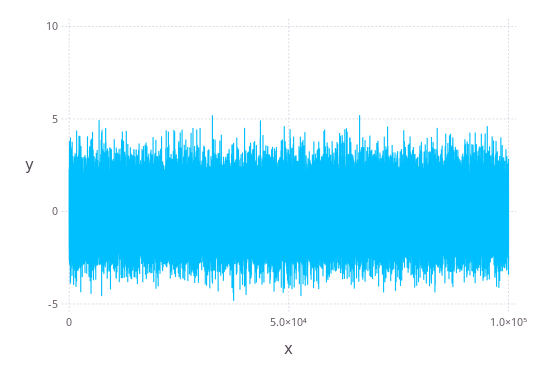

In [14]:
plot(x=t,y=x,Geom.line)

In [15]:
function c(k)
    ans = 0
    for i in k+1:N
        ans += x[i] * x[i-k]
    end
    return ans / N
end

c (generic function with 1 method)

In [16]:
C_m = zeros(M,M)

5x5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [17]:
for i in 1:M
    for j in 1:M
        C_m[i,j] = c(abs(j-i))
    end
end

In [18]:
C_m

5x5 Array{Float64,2}:
  1.45139     0.606123   0.0707935  -0.449721   -0.2197   
  0.606123    1.45139    0.606123    0.0707935  -0.449721 
  0.0707935   0.606123   1.45139     0.606123    0.0707935
 -0.449721    0.0707935  0.606123    1.45139     0.606123 
 -0.2197     -0.449721   0.0707935   0.606123    1.45139  

In [19]:
c_m = zeros(M)

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
for i in 1:M
    c_m[i] = c(i)
end

In [21]:
c_m

5-element Array{Float64,1}:
  0.606123 
  0.0707935
 -0.449721 
 -0.2197   
 -0.108345 

In [22]:
a_m = (C_m)\(c_m)

5-element Array{Float64,1}:
  0.498916 
 -0.0216769
 -0.406812 
  0.20388  
 -0.071145 

In [23]:
sigma = c(0) - (c_m)' * a_m
sigma[1]

1.0046501018962095

In [24]:
c(0) - dot(c_m,a_m)

1.0046501018962095